In [16]:
%pip install yfinance pandas numpy matplotlib seaborn scikit-learn pmdarima statsmodels

  Using cached numpy-2.2.1-cp311-cp311-macosx_14_0_arm64.whl.metadata (62 kB)
Using cached numpy-2.2.1-cp311-cp311-macosx_14_0_arm64.whl (5.4 MB)
Note: you may need to restart the kernel to use updated packages.


In [18]:
pip install --upgrade numpy pandas statsmodels pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 9.7 MB/s eta 0:00:00ta 0:00:01
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.0
    Uninstalling numpy-2.2.0:
      Successfully uninstalled numpy-2.2.0
Note: you may need to restart the kernel to use updated packages.


In [2]:
import yfinance as yf
import pandas as pd

# List of stocks
stocks = ["MSTR", "AAPL", "TSLA", "INTC", "MCD", "KO", "NKE"]

# Function to fetch and save data for each stock
def fetch_stock_data(stocks):
    for stock in stocks:
        ticker = yf.Ticker(stock)
        # Fetch historical market data
        hist = ticker.history(period="10y")  # Adjust the period as needed
        # Adding extra details to the dataset
        hist['Ticker'] = stock
        hist['Market Cap'] = ticker.info.get("marketCap", "N/A")
        hist['P/E Ratio'] = ticker.info.get("trailingPE", "N/A")
        hist['Dividend Yield'] = ticker.info.get("dividendYield", "N/A")
        hist['52-Week High'] = ticker.info.get("fiftyTwoWeekHigh", "N/A")
        hist['52-Week Low'] = ticker.info.get("fiftyTwoWeekLow", "N/A")
        
        # Save to CSV
        filename = f"{stock}_data.csv"
        hist.to_csv(filename)
        print(f"Saved {filename}")

# Run the function
fetch_stock_data(stocks)

Saved MSTR_data.csv
Saved AAPL_data.csv
Saved TSLA_data.csv
Saved INTC_data.csv
Saved MCD_data.csv
Saved KO_data.csv
Saved NKE_data.csv


In [3]:
def laod_stock_data(stocks):
    all_data = []

    for stock in stocks:
        df = pd.read_csv(f"{stock}_data.csv", parse_dates=['Date'], index_col='Date')
        all_data.append(df)
    
    return pd.concat(all_data)

In [4]:
data = laod_stock_data(stocks)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17619 entries, 2014-12-22 00:00:00-05:00 to 2024-12-20 00:00:00-05:00
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Open            17619 non-null  float64
 1   High            17619 non-null  float64
 2   Low             17619 non-null  float64
 3   Close           17619 non-null  float64
 4   Volume          17619 non-null  int64  
 5   Dividends       17619 non-null  float64
 6   Stock Splits    17619 non-null  float64
 7   Ticker          17619 non-null  object 
 8   Market Cap      17619 non-null  int64  
 9   P/E Ratio       12585 non-null  float64
 10  Dividend Yield  12585 non-null  float64
 11  52-Week High    17619 non-null  float64
 12  52-Week Low     17619 non-null  float64
dtypes: float64(10), int64(2), object(1)
memory usage: 1.9+ MB


In [6]:
data.dropna(inplace=True)

In [7]:
data.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Market Cap,P/E Ratio,Dividend Yield,52-Week High,52-Week Low
count,10068.000000,10068.000000,10068.000000,10068.000000,1.006800e+04,10068.000000,10068.000000,1.006800e+04,10068.000000,10068.000000,10068.000000,10068.000000
mean,100.845765,101.719784,99.983931,100.873099,3.585507e+07,0.008209,0.000596,1.110135e+12,29.313601,0.019975,189.097500,134.072500
std,70.058001,70.612536,69.508847,70.079574,5.837843e+07,0.084941,0.044568,1.581070e+12,7.292354,0.009982,100.692406,75.317773
min,20.619369,21.001973,20.497939,20.697258,9.632000e+05,0.000000,0.000000,1.145252e+11,23.746914,0.003900,73.530000,57.930000
25%,45.570135,45.920192,45.231715,45.562280,5.076200e+06,0.000000,0.000000,1.859366e+11,25.208897,0.016575,100.852500,67.545000
50%,76.008257,76.849456,75.549022,76.150589,9.955650e+06,0.000000,0.000000,2.395966e+11,25.825290,0.022500,182.480000,117.415000
75%,142.425201,144.147468,141.259949,142.822834,3.714382e+07,0.000000,0.000000,1.163795e+12,29.929994,0.025900,270.725000,183.942500
max,315.233707,315.999091,312.529970,314.667114,6.488252e+08,1.770000,4.000000,3.846820e+12,41.856910,0.031000,317.900000,243.530000


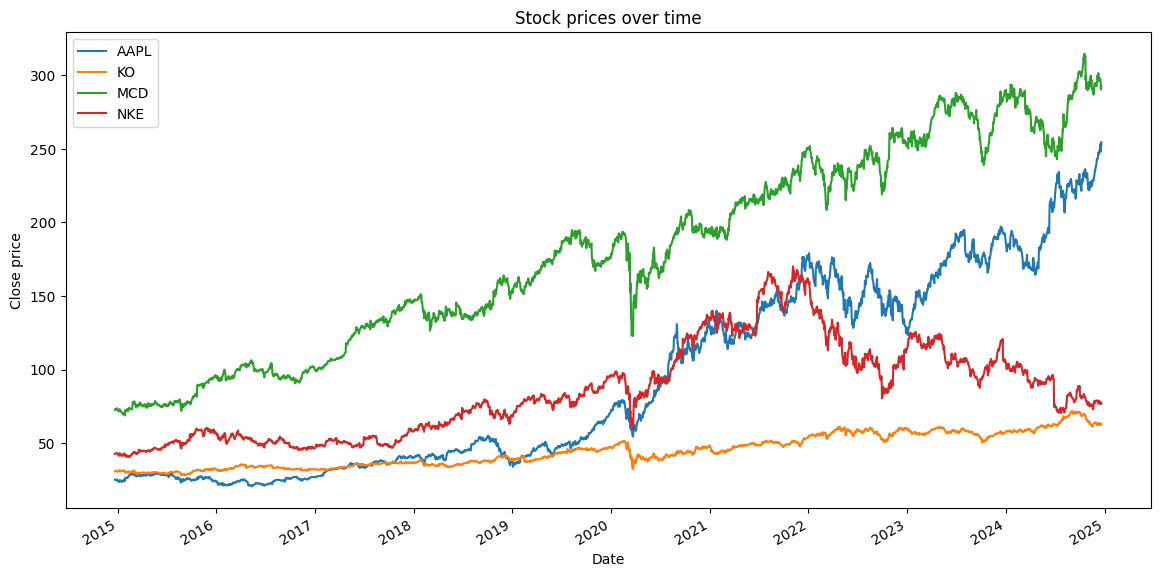

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

pivot_df = data.pivot_table(values='Close', index='Date', columns='Ticker')
pivot_df.plot(figsize=(14, 7))
plt.title('Stock prices over time')
plt.xlabel('Date')
plt.ylabel('Close price')
plt.legend(loc='best')
plt.show()

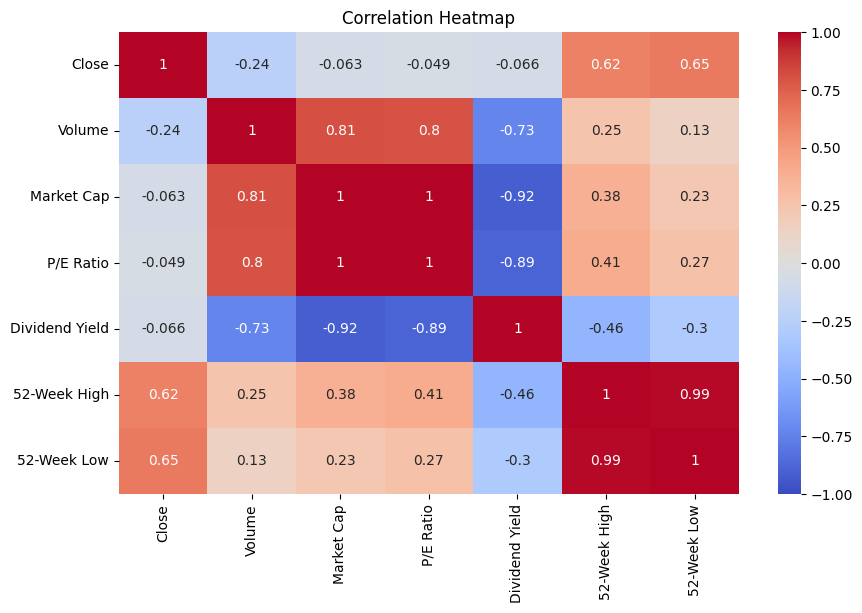

In [9]:
corr_features = ['Close', 'Volume', 'Market Cap','P/E Ratio', 'Dividend Yield', '52-Week High', '52-Week Low']
corr_data = data[corr_features].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_data, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

In [10]:
from sklearn.preprocessing import StandardScaler
X = data[['Close', 'Market Cap', '52-Week High', '52-Week Low']]
y = data['Close'].shift(-1).dropna()
X = X[:-1]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [11]:
from sklearn.model_selection import train_test_split, GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [12]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean squared error: {mse}")

Mean squared error: 3.660878816263472


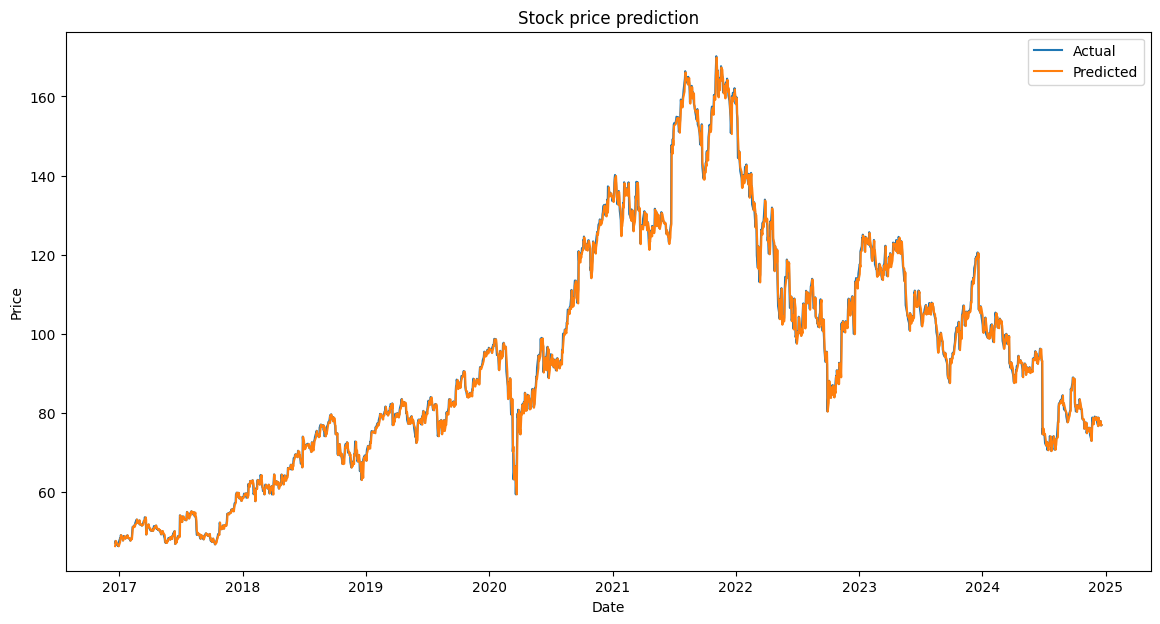

In [13]:
plt.figure(figsize=(14,7))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, y_pred, label='Predicted')
plt.title('Stock price prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [14]:
lasso = Lasso()
params = {'alpha': [0.01, 0.1, 1, 10, 100]}
grid_search_lasso = GridSearchCV(lasso, params, cv=5)
grid_search_lasso.fit(X_train, y_train)

lasso_pred = grid_search_lasso.best_estimator_.predict(X_test)
lasso_mse = mean_squared_error(y_test, lasso_pred)
print(f"Lasso Regression Mean Squared Error: {lasso_mse}")

/Users/davidevitale/Desktop/MSc Data Science/FDS/Homeworks/Final/Final - Git/FDS-Final/.venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.133e+04, tolerance: 4.053e+03
  model = cd_fast.enet_coordinate_descent(
/Users/davidevitale/Desktop/MSc Data Science/FDS/Homeworks/Final/Final - Git/FDS-Final/.venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.247e+04, tolerance: 4.177e+03
  model = cd_fast.enet_coordinate_descent(
/Users/davidevitale/Desktop/MSc Data Science/FDS/Homeworks/Final/Final - Git/FDS-Final/.venv/lib/python3.11/site-packages/sklearn/linear_m

Lasso Regression Mean Squared Error: 3.6563222683617167


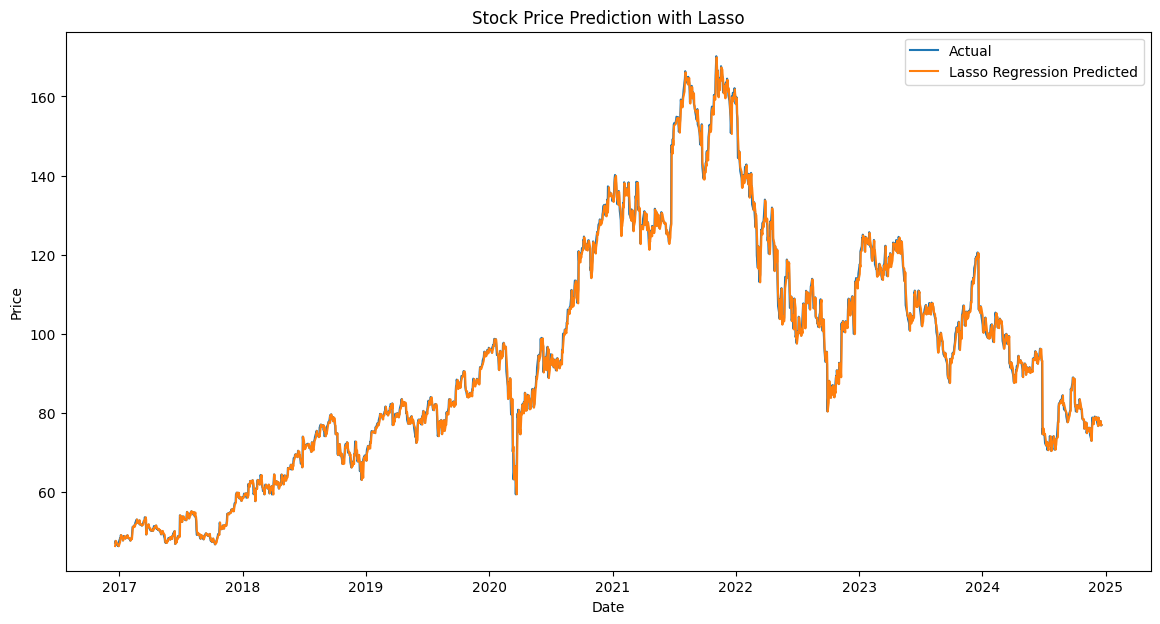

In [31]:
plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, lasso_pred, label='Lasso Regression Predicted')
plt.title('Stock Price Prediction with Lasso')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()